# Sign Language Recognition  

# About the data

The original MNIST image dataset of handwritten digits is a popular benchmark for image-based machine learning methods but researchers have renewed efforts to update it and develop drop-in replacements that are more challenging for computer vision and original for real-world applications. As noted in one recent replacement called the Fashion-MNIST dataset, the Zalando researchers quoted the startling claim that "Most pairs of MNIST digits (784 total pixels per sample) can be distinguished pretty well by just one pixel". To stimulate the community to develop more drop-in replacements, the Sign Language MNIST is presented here and follows the same CSV format with labels and pixel values in single rows. The American Sign Language letter database of hand gestures represent a multi-class problem with 24 classes of letters (excluding J and Z which require motion).

Load the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('Dataset/sign_mnist_train.csv')
test = pd.read_csv('Dataset/sign_mnist_test.csv')

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [30]:
train.shape

(27455, 785)

The data set is given in the form of labels and pixel value ranging from pixel 1 to pixel 784 which is 28 * 28 image.

Each letter indicates a sign produced by our fingers. We will apply deep learning to these images to make sure our model can understand what sign indicated what letter

In [32]:
labels = train['label'].values

In [33]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

# Data exploration

<Axes: ylabel='count'>

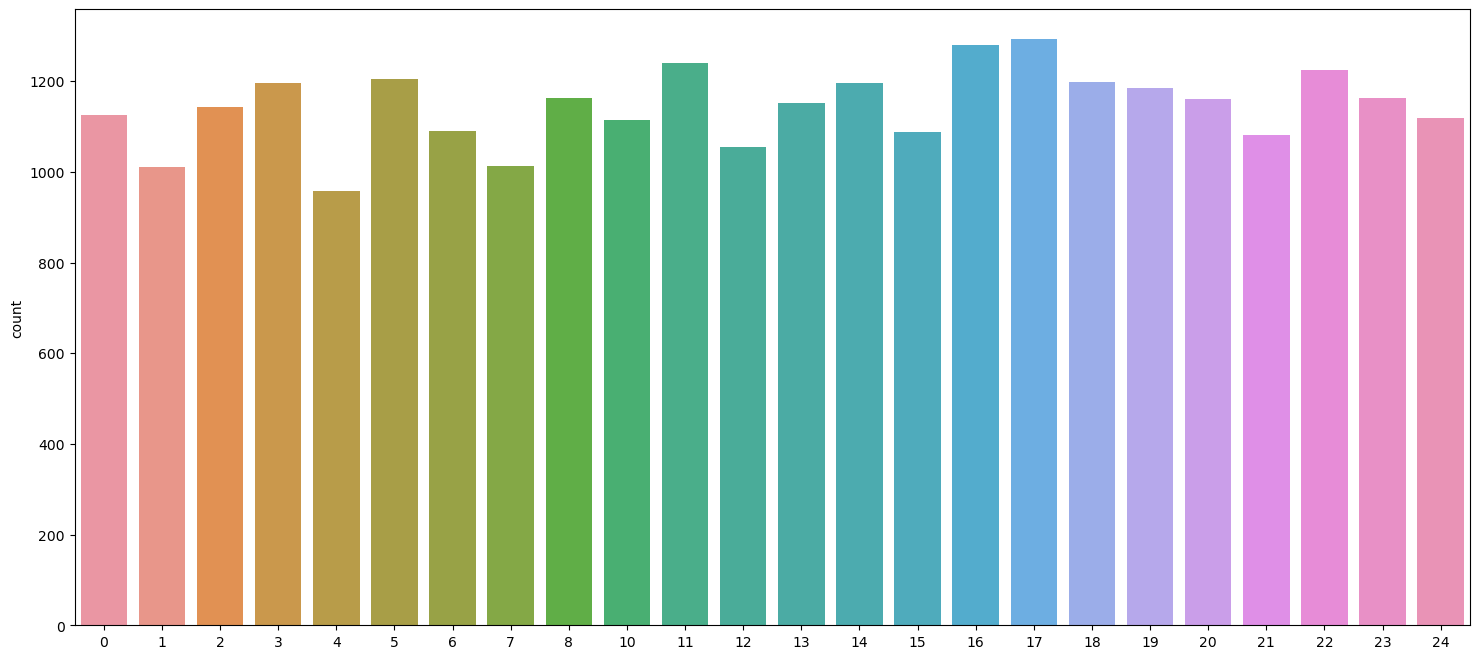

In [34]:
plt.figure(figsize = (18,8))
sns.countplot(x =labels)

As you can see each one is almost equally distributed

In [35]:
train.drop('label', axis = 1, inplace = True)

We are droping the label coloumn from the training set

Re shaping the images

In [36]:
images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

Since our target variable are in categorical(nomial) so we are using label binarizer

In [37]:
from sklearn.preprocessing import LabelBinarizer
label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [38]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

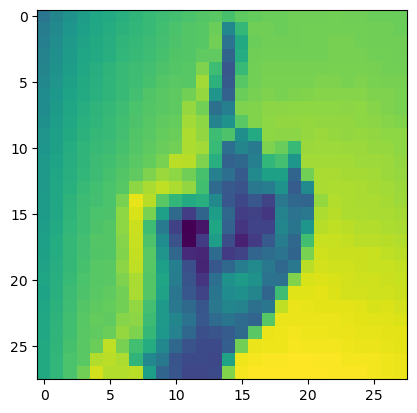

In [39]:
plt.imshow(images[0].reshape(28,28))

Spliting the dataset into train(70%) and test(30%)

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [42]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

Creating the batch size to 128 and using 50 epochs

In [44]:
batch_size = 128
num_classes = 24
epochs = 25

Normalizing the training and test data

In [45]:
x_train = x_train / 255
x_test = x_test / 255

In [46]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

In [47]:
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

Visualizing the image after normalizing

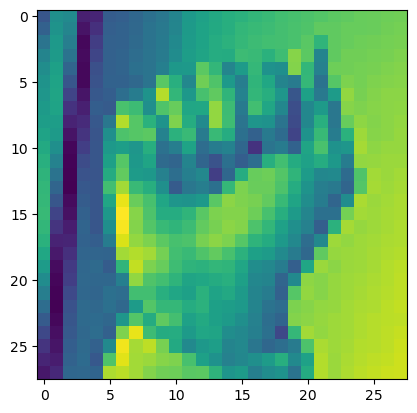

In [48]:
plt.imshow(x_train[0].reshape(28,28))

# CNN Model

In [49]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))

C:\Users\Aakash\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [50]:
model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [51]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)
model.save('smnist4.h5')

Epoch 1/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 10s 58ms/step - accuracy: 0.1060 - loss: 2.9796 - val_accuracy: 0.4764 - val_loss: 1.6361
Epoch 2/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.5190 - loss: 1.4457 - val_accuracy: 0.7571 - val_loss: 0.7530
Epoch 3/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.7294 - loss: 0.7849 - val_accuracy: 0.8153 - val_loss: 0.5272
Epoch 4/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - accuracy: 0.8143 - loss: 0.5254 - val_accuracy: 0.8941 - val_loss: 0.3217
Epoch 5/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.8782 - loss: 0.3578 - val_accuracy: 0.9454 - val_loss: 0.1856
Epoch 6/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.9218 - loss: 0.2384 - val_accuracy: 0.9633 - val_loss: 0.1383
Epoch 7/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.9461 - loss: 0.1749 - val_accuracy: 0.9733 - val_loss: 0.0934
Epoch 8/25
151/151 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - accuracy: 0.9566 - loss: 0.1311 - val_acc

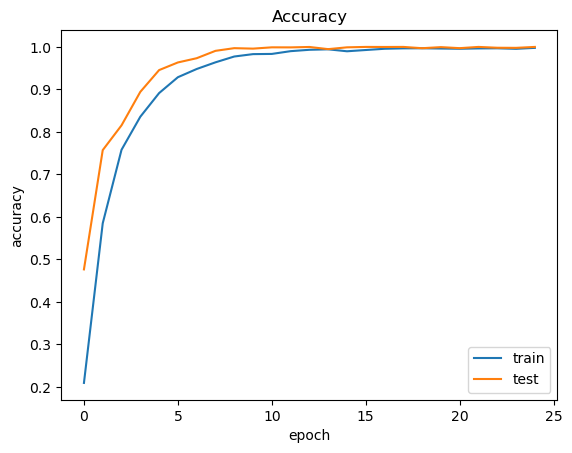

In [55]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

As you can see, the number of epochs increase the accuracy also increases.

Let's validate with the test data

In [56]:
test_labels = test['label']

In [57]:
test.drop('label', axis = 1, inplace = True)

In [58]:
test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

In [59]:
test_labels = label_binrizer.fit_transform(test_labels)

In [60]:
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [61]:
test_images.shape

(7172, 28, 28, 1)

Predecting with test images

In [62]:
y_pred = model.predict(test_images)

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [63]:
from sklearn.metrics import accuracy_score

In [64]:
accuracy_score(test_labels, y_pred.round())

0.8478806469604016

Live Demonstration 

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
import cv2
import mediapipe as mp
from keras.models import load_model
import numpy as np
import time
import pandas as pd

model = load_model('smnist4.h5')

mphands = mp.solutions.hands
hands = mphands.Hands()
mp_drawing = mp.solutions.drawing_utils
cap = cv2.VideoCapture(0)

_, frame = cap.read()

h, w, c = frame.shape

img_counter = 0
analysisframe = ''
letterpred = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']
while True:
    _, frame = cap.read()

    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        # SPACE pressed
        analysisframe = frame
        showframe = analysisframe
        cv2.imshow("Frame", showframe)
        framergbanalysis = cv2.cvtColor(analysisframe, cv2.COLOR_BGR2RGB)
        resultanalysis = hands.process(framergbanalysis)
        hand_landmarksanalysis = resultanalysis.multi_hand_landmarks
        if hand_landmarksanalysis:
            for handLMsanalysis in hand_landmarksanalysis:
                x_max = 0
                y_max = 0
                x_min = w
                y_min = h
                for lmanalysis in handLMsanalysis.landmark:
                    x, y = int(lmanalysis.x * w), int(lmanalysis.y * h)
                    if x > x_max:
                        x_max = x
                    if x < x_min:
                        x_min = x
                    if y > y_max:
                        y_max = y
                    if y < y_min:
                        y_min = y
                y_min -= 20
                y_max += 20
                x_min -= 20
                x_max += 20 

        analysisframe = cv2.cvtColor(analysisframe, cv2.COLOR_BGR2GRAY)
        analysisframe = analysisframe[y_min:y_max, x_min:x_max]
        analysisframe = cv2.resize(analysisframe,(28,28))


        nlist = []
        rows,cols = analysisframe.shape
        for i in range(rows):
            for j in range(cols):
                k = analysisframe[i,j]
                nlist.append(k)
        
        datan = pd.DataFrame(nlist).T
        colname = []
        for val in range(784):
            colname.append(val)
        datan.columns = colname

        pixeldata = datan.values
        pixeldata = pixeldata / 255
        pixeldata = pixeldata.reshape(-1,28,28,1)
        prediction = model.predict(pixeldata)
        predarray = np.array(prediction[0])
        letter_prediction_dict = {letterpred[i]: predarray[i] for i in range(len(letterpred))}
        predarrayordered = sorted(predarray, reverse=True)
        high1 = predarrayordered[0]
        high2 = predarrayordered[1]
        high3 = predarrayordered[2]
        for key,value in letter_prediction_dict.items():
            if value==high1:
                print("Predicted Character 1: ", key)
                print('Confidence 1: ', 100*value)
            elif value==high2:
                print("Predicted Character 2: ", key)
                print('Confidence 2: ', 100*value)
            elif value==high3:
                print("Predicted Character 3: ", key)
                print('Confidence 3: ', 100*value)
        time.sleep(5)

    framergb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    result = hands.process(framergb)
    hand_landmarks = result.multi_hand_landmarks
    if hand_landmarks:
        for handLMs in hand_landmarks:
            x_max = 0
            y_max = 0
            x_min = w
            y_min = h
            for lm in handLMs.landmark:
                x, y = int(lm.x * w), int(lm.y * h)
                if x > x_max:
                    x_max = x
                if x < x_min:
                    x_min = x
                if y > y_max:
                    y_max = y
                if y < y_min:
                    y_min = y
            y_min -= 20
            y_max += 20
            x_min -= 20
            x_max += 20
            cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
    cv2.imshow("Frame", frame)

cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Predicted Character 1:  O
Confidence 1:  98.38212728500366
Predicted Character 2:  Q
Confidence 2:  1.0673368349671364
Predicted Character 3:  X
Confidence 3:  0.5444257985800505
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Character 2:  G
Confidence 2:  0.08490467444062233
Predicted Character 3:  H
Confidence 3:  0.07740820874460042
Predicted Character 1:  L
Confidence 1:  99.8301088809967
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted Character 3:  L
Confidence 3:  1.4288574490262107e-08
Predicted Character 1:  P
Confidence 1:  100.0
Predicted Character 2:  X
Confidence 2:  3.6809957859595954e-08
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predicted Character 3:  O
Confidence 3:  0.0015891846487647854
Predicted Character 1:  Q
Confidence 1:  99.9825656414032
Predicted Character 2:  X
Confidence 2:  0.01575507631059736
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Character 1:  A
Confidence 1:  99.9992847442627
Predicted Character 2:  N
Confidenc